Project Notes:
- Dataset: https://www.kaggle.com/prachi13/customer-analytics
- How to export google colab as html: https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab

# Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches, rcParams
from scipy import stats

In [2]:
# rcParams['figure.figsize'] = (8,5)
# rcParams['lines.linewidth'] = 2.5
# rcParams['xtick.labelsize'] = 'x-large'
# rcParams['ytick.labelsize'] = 'x-large'
# rcParams['axes.spines.right'] = False
# rcParams['axes.spines.top'] = False
custom_params = {
    'figure.figsize':(8,5),
    'lines.linewidth':2.5,
    'axes.titlesize':20,
    'axes.labelsize':16,
    'xtick.labelsize':14,
    'ytick.labelsize':14,
    'axes.spines.right':False,
    'axes.spines.top':False
}
sns.set_theme(style='ticks', font_scale=1.25, context='notebook', rc=custom_params, palette='Set2')

In [3]:
# colors
red = '#E33131'
blue = '#3772FF'
gray = '#C0C5C1'
darkgray = '#858786'
yellow = '#F5D491'
orange = '#E89005'
black = '#080708'
white = '#FEFFFE'
green = '#4CB944'

In [4]:
url = 'https://raw.githubusercontent.com/fnurrahmadi/data-science-portfolio/main/E-Commerce%20Shipping%20Data/csv/Train.csv'

# Data Overview

In [5]:
df = pd.read_csv(url)
df.head()

ID Warehouse_block  ... Weight_in_gms  Reached.on.Time_Y.N
0   1               D  ...          1233                    1
1   2               F  ...          3088                    1
2   3               A  ...          3374                    1
3   4               B  ...          1177                    1
4   5               C  ...          2484                    1

[5 rows x 12 columns]

In [6]:
columns = [col.lower() if col!='Reached.on.Time_Y.N' else 'late_delivery' for col in df.columns]
df.columns = columns
df.columns

Index(['id', 'warehouse_block', 'mode_of_shipment', 'customer_care_calls',
       'customer_rating', 'cost_of_the_product', 'prior_purchases',
       'product_importance', 'gender', 'discount_offered', 'weight_in_gms',
       'late_delivery'],
      dtype='object')

Untuk memudahkan penggunaan kolom-kolom yang ada, semua kolom dibuat menjadi lowercase, dan kolom yang ambigu diubah menjadi lebih jelas. Jadi, kolom dari dataset ini menjadi:

- id
- warehouse_block
- mode_of_shipment
- customer_care_calls
- customer_rating
- cost_of_the_product
- prior_purchases
- product_importance
- gender
- discount_offered
- weight_in_gms
- late_delivery

Pada variabel target kita yakni late_delivery, berikut adalah penjelasan valuenya:
- 1 == did not reach on time
- 0 == reached on time

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   10999 non-null  int64 
 1   warehouse_block      10999 non-null  object
 2   mode_of_shipment     10999 non-null  object
 3   customer_care_calls  10999 non-null  int64 
 4   customer_rating      10999 non-null  int64 
 5   cost_of_the_product  10999 non-null  int64 
 6   prior_purchases      10999 non-null  int64 
 7   product_importance   10999 non-null  object
 8   gender               10999 non-null  object
 9   discount_offered     10999 non-null  int64 
 10  weight_in_gms        10999 non-null  int64 
 11  late_delivery        10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()

id                     0
warehouse_block        0
mode_of_shipment       0
customer_care_calls    0
customer_rating        0
cost_of_the_product    0
prior_purchases        0
product_importance     0
gender                 0
discount_offered       0
weight_in_gms          0
late_delivery          0
dtype: int64

In [10]:
nums = [col for col in df.columns if df[col].dtype != 'O']
cats = [col for col in df.columns if df[col].dtype == 'O']
print('Numerical:',nums)
print('Categorical:',cats)

Numerical: ['id', 'customer_care_calls', 'customer_rating', 'cost_of_the_product', 'prior_purchases', 'discount_offered', 'weight_in_gms', 'late_delivery']
Categorical: ['warehouse_block', 'mode_of_shipment', 'product_importance', 'gender']


In [ ]:
df[nums].describe()

id  customer_care_calls  ...  weight_in_gms  late_delivery
count  10999.00000         10999.000000  ...   10999.000000   10999.000000
mean    5500.00000             4.054459  ...    3634.016729       0.596691
std     3175.28214             1.141490  ...    1635.377251       0.490584
min        1.00000             2.000000  ...    1001.000000       0.000000
25%     2750.50000             3.000000  ...    1839.500000       0.000000
50%     5500.00000             4.000000  ...    4149.000000       1.000000
75%     8249.50000             5.000000  ...    5050.000000       1.000000
max    10999.00000             7.000000  ...    7846.000000       1.000000

[8 rows x 8 columns]

In [ ]:
df[cats].describe()

warehouse_block mode_of_shipment product_importance gender
count            10999            10999              10999  10999
unique               5                3                  3      2
top                  F             Ship                low      F
freq              3666             7462               5297   5545

In [ ]:
for col in cats:
  print(col,':')
  print(df[col].value_counts(dropna=False),'\n')

warehouse_block :
F    3666
D    1834
B    1833
C    1833
A    1833
Name: warehouse_block, dtype: int64 

mode_of_shipment :
Ship      7462
Flight    1777
Road      1760
Name: mode_of_shipment, dtype: int64 

product_importance :
low       5297
medium    4754
high       948
Name: product_importance, dtype: int64 

gender :
F    5545
M    5454
Name: gender, dtype: int64 



Hasil observasi dari descriptive statistics:
- Tidak ada kolom yang tipe datanya salah.
- Terdapat sebanyak 10999 rows dan tidak ada data yang null.
- Dari kolom numerikal, tidak terdapat nilai yang isinya salah, karena tipe data integer sudah menandakan bahwa semua datanya sudah numerik.
- Dari kolom categorical, value counts menunjukkan bahwa setiap unique value masuk akal dan tidak ada yang salah.
- Baik dari kolom numerikal maupun kolom kategorikal, tidak ada nilai summary yang tidak masuk akal.

Insights dari descriptive statistics:
- Kolom **Customer_care_calls** dan **Customer_rating** terlihat distribusinya cukup simterik (*Mean* dan *Median* tidak berbeda jauh).
- Kolom **Prior_purchases** dan **Discount_offered** terlihat Positively Skewd.
- Kolom **Reached.on.Time_Y.N** bernilai boolean.
- **Mode_of_Shipment** paling banyak dilakukan dengan melewati jalur laut *(ship)* sebanyak 7462.
- **Warehouse_block** untuk pengiriman paling banyak dari *Warehouse F* sebanyak 3666.
- **Product_importance** paling banyak dengan kategori *Low* sebanyak 5297.
- **Gender** paling banyak melakukan transaksi berasal dari *Female* sebanyak 5545.

# EDA

## Univariate Analysis

### Numerical

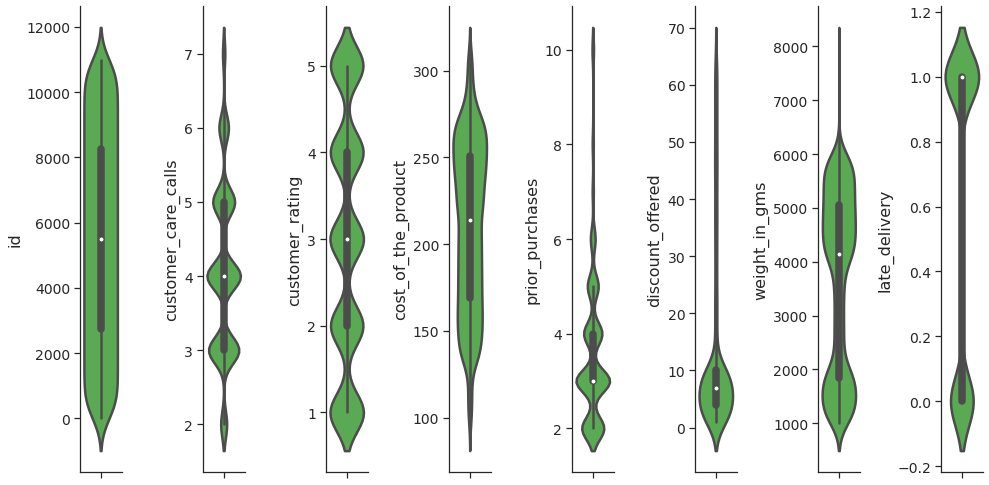

In [ ]:
plt.figure(figsize=(14,7))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=df[nums[i]], color=green, orient='v')
    plt.tight_layout()

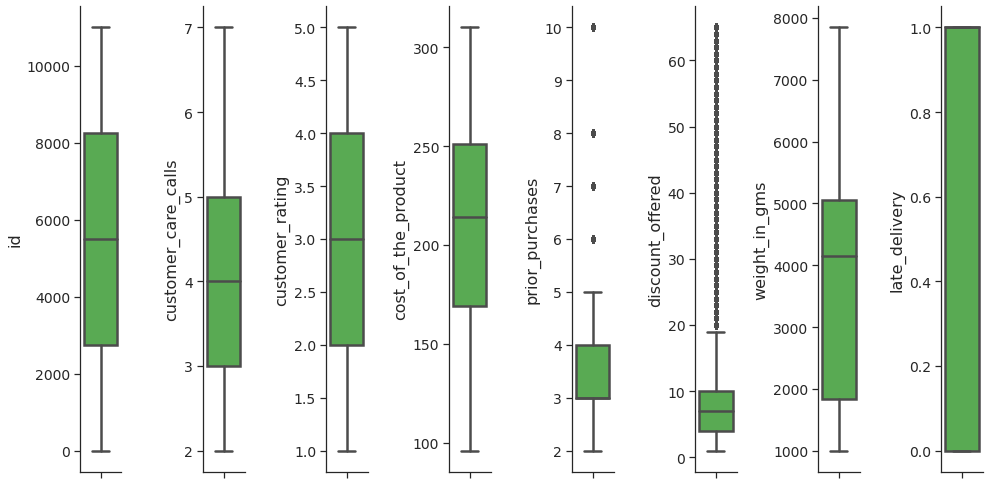

In [ ]:
features = nums
plt.figure(figsize=(14,7))
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y=df[features[i]], color=green, orient='v')
  plt.tight_layout()

Insight:
- Terdapat outlier pada kolom `Prior_purchases` dan `Discount_offered`

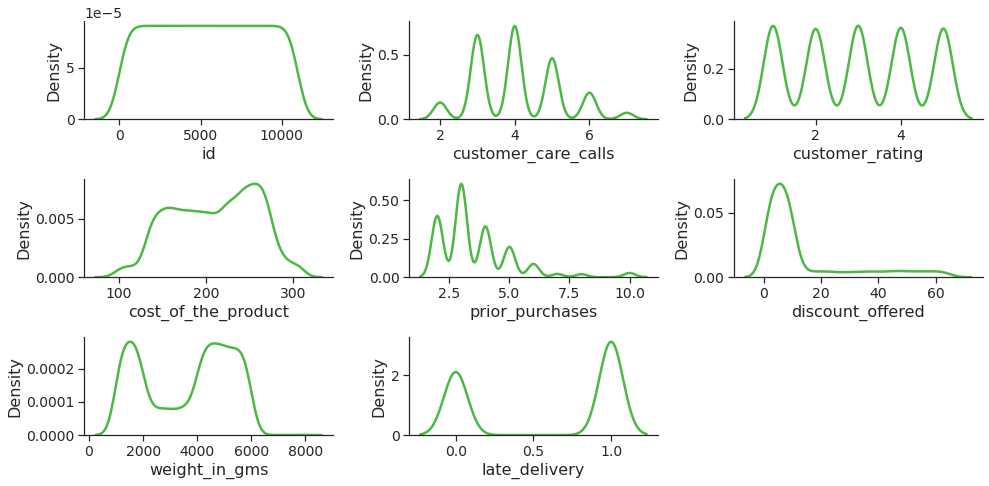

In [ ]:
features = nums
plt.figure(figsize=(14,7))
for i in range(0, len(features)):
  plt.subplot(3, 3, i+1)
  sns.kdeplot(x=df[features[i]], color=green)
  plt.xlabel(features[i])
  plt.tight_layout()

Insight:
- Terlihat bahwa kolom `Prior_purchases` cenderung skew ke kanan dan kolom `Discount_offered` skew ke kanan dengan buntut panjang
- Kita juga tahu bahwa pada kolom `Reached.on.Time_Y.N` barang yang tidak sampai tepat waktu lebih banyak di banding yang tepat waktu
- `Customer_care_calls` memiliki mode pada angka 4 dan cenderung skew ke kanan
- `Customer_rating` memiliki distribusi uniform
- `Cost_of_the_product` dan `Weight_in_gms` memiliki distribusi bimodal

Notes untuk data preprocessing:
- `Prior_purchases` dan `discount_offered` dapat ditransformasi menggunakan log transformation karena positively skewed
- `Cost_of_the_product` dan `Weight_in_gms` yang memiliki distribusi bimodal dapat ditransformasi menggunakan formula tersebut --> abs(data) - mean(data)

### Categorical

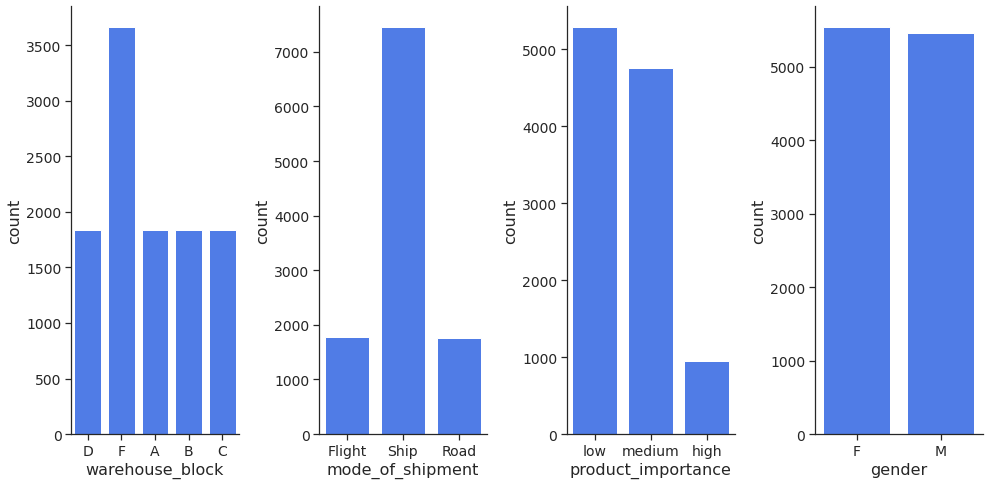

In [ ]:
features = cats
plt.figure(figsize=(14,7))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.countplot(x=df[features[i]], color=blue)
plt.tight_layout()

Insight:
- Warehouse block F memiliki shipment paling banyak
- Ship adalah shipment mode yang paling sering digunakan
- Pada product importance, low adalah yang paling banyak, lalu medium, dan baru high, dengan jumlah yang sangat sedikit jika dibandingkan dengan group lainnya
- Secara gender, tidak ada perbedaan jumlah shipment

## Multivariate Analysis

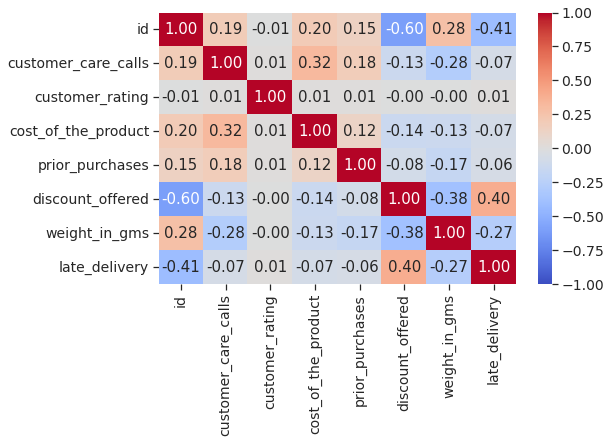

In [ ]:
sns.heatmap(df.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True, fmt='.2f')

Insight:
- `id` memiliki korelasi negatif dengan target `Reached.on.Time_Y.N` yaitu sebesar -0.41
- `Discount_offered` memiliki korelasi positif dengan target `Reached.on.Time_Y.N` yaitu sebesar 0.40
- `Weight_in_gms` memiliki korelasi negatif dengan target `Reached.on.Time_Y.N` yaitu sebesar -0.27

<Figure size 576x576 with 0 Axes>

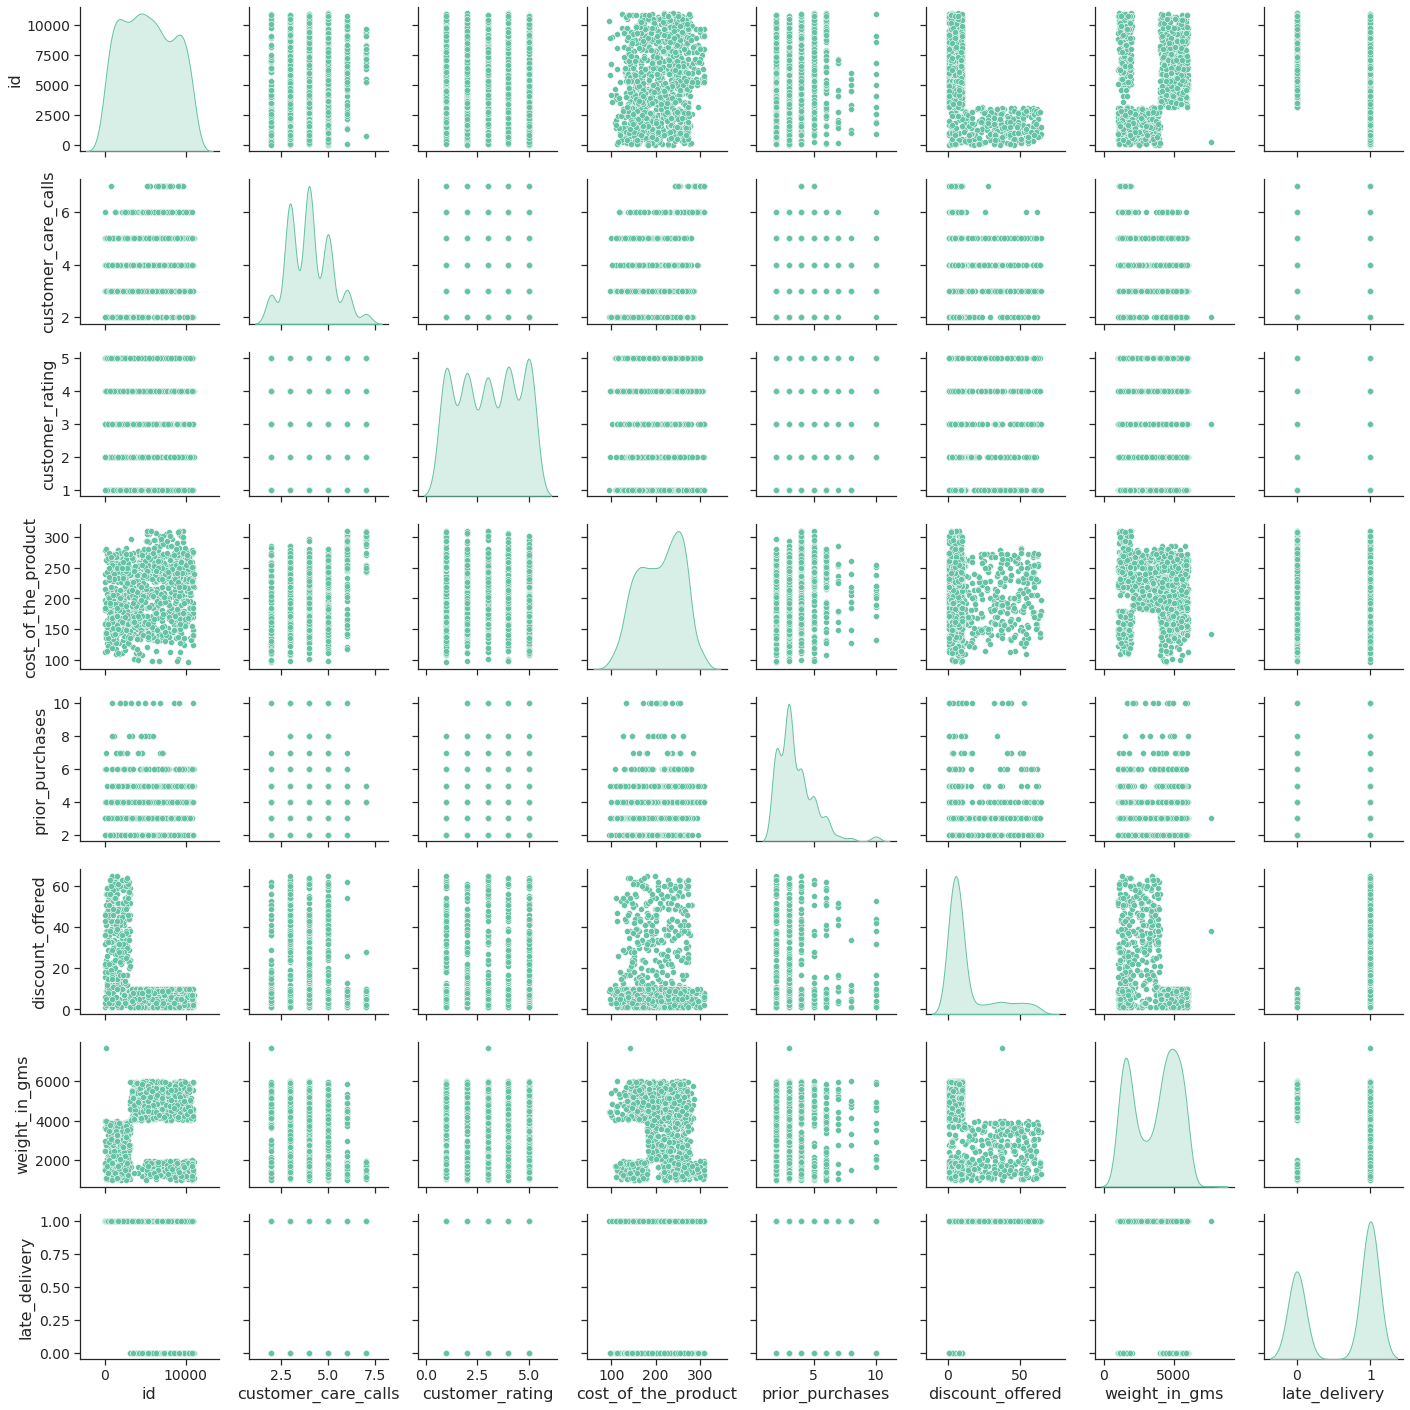

In [ ]:
plt.figure(figsize=(8, 8))
sns.pairplot(df.sample(frac=0.1), diag_kind='kde', palette='aqua')

Insight:
- beberapa feature yang memiliki korelasi cukup kuat dengan label (Reached.on.Time_Y.N) adalah discount_offered dan id
- secara umum, tidak ada antar feature yang memiliki korelasi yang kuat



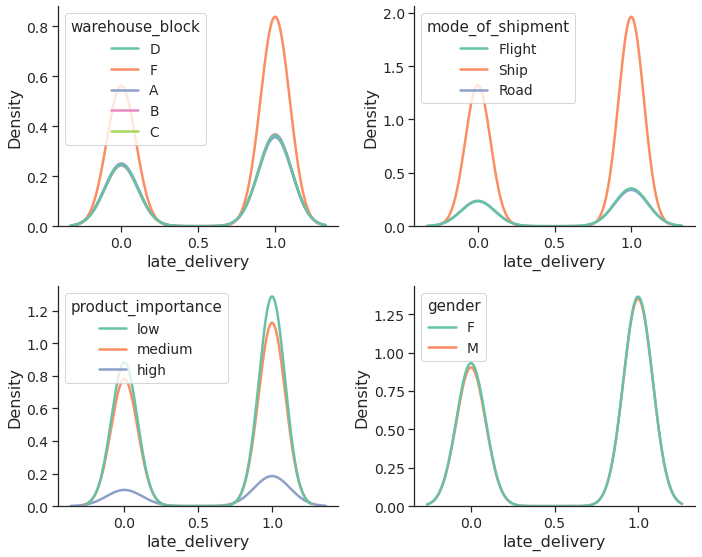

In [ ]:
features = cats
plt.figure(figsize=(10,8))
for i in range(0, len(features)):
    plt.subplot(2, 2, i+1) 
    sns.kdeplot(data=df, x='late_delivery', hue=features[i])
    #plt.xlabel(features[i])
    plt.tight_layout()

Insight:
- Warehouse block F memiliki late delivery paling banyak diantara semua warehouse block
- Ship memiliki late delivery paling banyak dari semua mode shipment
- Terdapat late delivery paling banyak di low product importance, lalu medium
- Secara gender, tidak ada beda jumlah late delivery

In [ ]:
dfg = df.groupby(['late_delivery',]).agg({
                                   'id':'nunique',
                                   'prior_purchases':['mean','median'],
                                   'cost_of_the_product':['mean','median'],
                                   'discount_offered':['mean','median'],
                                   'weight_in_gms':['mean','median'],
                                   'customer_rating':['mean','median'],
                                   'customer_care_calls':['mean','median'],})
dfg

id prior_purchases         ... customer_rating customer_care_calls       
              nunique            mean median  ...          median                mean median
late_delivery                                 ...                                           
0                4436        3.670424      3  ...               3            4.147656      4
1                6563        3.498095      3  ...               3            3.991467      4

[2 rows x 13 columns]

Insight:
- Kemungkinan cost of product sudah termasuk discount offered, karena cost of product semakin rendah, discount semakin tinggi
- Weight in gms untuk barang yang on time justru lebih ringan daripada barang yang late

In [ ]:
dfg = df.groupby(['late_delivery','gender']).agg({
                                   'id':'nunique',
                                   'prior_purchases':['mean','median'],
                                   'cost_of_the_product':['mean','median'],
                                   'discount_offered':['mean','median'],
                                   'weight_in_gms':['mean','median'],
                                   'customer_rating':['mean','median'],
                                   'customer_care_calls':['mean','median'],})
dfg

id prior_purchases  ... customer_care_calls       
                     nunique            mean  ...                mean median
late_delivery gender                          ...                           
0             F         2249        3.670076  ...            4.148066      4
              M         2187        3.670782  ...            4.147234      4
1             F         3296        3.521541  ...            3.985740      4
              M         3267        3.474441  ...            3.997245      4

[4 rows x 13 columns]

Insight:
- Tidak jauh perbedaan antara Male dan Female, ketika dibedakan late delivery dan on time delivery

In [ ]:
dfg = df.groupby(['late_delivery','warehouse_block']).agg({
                                   'id':'nunique',
                                   'prior_purchases':['mean','median'],
                                   'cost_of_the_product':['mean','median'],
                                   'discount_offered':['mean','median'],
                                   'weight_in_gms':['mean','median'],
                                   'customer_rating':['mean','median'],
                                   'customer_care_calls':['mean','median'],})
dfg

id  ... customer_care_calls
                              nunique  ...              median
late_delivery warehouse_block          ...                    
0             A                   758  ...                   4
              B                   729  ...                   4
              C                   739  ...                   4
              D                   738  ...                   4
              F                  1472  ...                   4
1             A                  1075  ...                   4
              B                  1104  ...                   4
              C                  1094  ...                   4
              D                  1096  ...                   4
              F                  2194  ...                   4

[10 rows x 13 columns]

Insight:
- Warehouse block F memiliki shipment terbanyak, mau late atau tidak
- Warehouse selain F memiliki angka shipment dan nilai-nilai yang serupa
- Pada setiap warehouse, rasio late delivery serupa

In [ ]:
dfg = df.groupby(['late_delivery','mode_of_shipment']).agg({
                                   'id':'nunique',
                                   'prior_purchases':['mean','median'],
                                   'cost_of_the_product':['mean','median'],
                                   'discount_offered':['mean','median'],
                                   'weight_in_gms':['mean','median'],
                                   'customer_rating':['mean','median'],
                                   'customer_care_calls':['mean','median'],})
dfg

id  ... customer_care_calls
                               nunique  ...              median
late_delivery mode_of_shipment          ...                    
0             Flight               708  ...                   4
              Road                 725  ...                   4
              Ship                3003  ...                   4
1             Flight              1069  ...                   4
              Road                1035  ...                   4
              Ship                4459  ...                   4

[6 rows x 13 columns]

Insight:
- Mode shipment Ship digunakan paling banyak, mau late atau tidak
- Flight dan road memiliki nilai yang kurang lebih sama
- Rasio late delivery pada setiap shipment mode serupa

In [ ]:
dfg = df.groupby(['late_delivery','product_importance']).agg({
                                   'id':'nunique',
                                   'prior_purchases':['mean','median'],
                                   'cost_of_the_product':['mean','median'],
                                   'discount_offered':['mean','median'],
                                   'weight_in_gms':['mean','median'],
                                   'customer_rating':['mean','median'],
                                   'customer_care_calls':['mean','median'],})
dfg

id  ... customer_care_calls
                                 nunique  ...              median
late_delivery product_importance          ...                    
0             high                   332  ...                   4
              low                   2157  ...                   4
              medium                1947  ...                   4
1             high                   616  ...                   4
              low                   3140  ...                   4
              medium                2807  ...                   4

[6 rows x 13 columns]

Insight:
- High memiliki angka shipment yang kecil sendiri, low adalah terbanyak dan diikuti medium
- Product cost terurut dari paling mahal ke kecil dengan urutan: low, medium, high, dan product cost late delivery sedikit lebih murah daripada on time delivery
- Discount untuk late delivery jauh lebih banyak dibanding on time
- Weight in gms terurut dari paling berat ke ringan dengan urutan: low, medium, high, dan berat late delivery lebih ringan daripada on time delivery

Kesimpulan untuk fitur yang akan dipakai:
- Dari fitur numerikal, yang berkorelasi dengan target adalah `id`, `discount_offered`, `weight_in_gms`
- Dari fitur kategorikal, yang terlihat ada relevansi dengan target adalah `warehouse_block`, `mode_of_shipment`, dan `product_importance`

# Business Insights

In [ ]:
df.groupby(['product_importance','late_delivery']).agg({'customer_care_calls':'count'})

customer_care_calls
product_importance late_delivery                     
high               0                              332
                   1                              616
low                0                             2157
                   1                             3140
medium             0                             1947
                   1                             2807

In [ ]:
dfg = df.groupby(['product_importance','late_delivery']).agg({'customer_care_calls':'sum'}).reset_index()
# dfg.plot(kind='bar')
dfg

product_importance  late_delivery  customer_care_calls
0               high              0                 1290
1               high              1                 2381
2                low              0                 9128
3                low              1                12644
4             medium              0                 7981
5             medium              1                11171

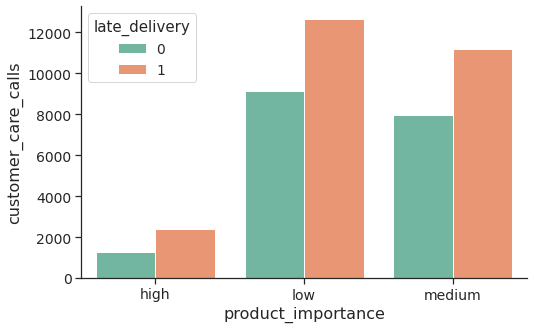

In [ ]:
sns.barplot(data=dfg, y='customer_care_calls', x='product_importance', hue='late_delivery')

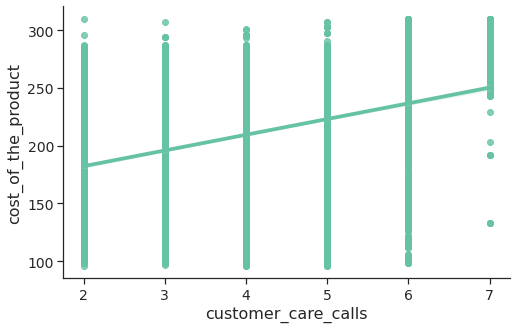

In [ ]:
sns.regplot(data=df, y='cost_of_the_product', x='customer_care_calls')

Insight:
- Dari regplot di atas, terlihat bahwa yang menelpon lebih banyak adalah yang memesan barang yang lebih mahal

In [ ]:
dfg = df.groupby('late_delivery').agg({'id':'nunique'})
dfg['ratio'] = round(100*dfg['id']/len(df),2)
dfg

id  ratio
late_delivery             
0              4436  40.33
1              6563  59.67

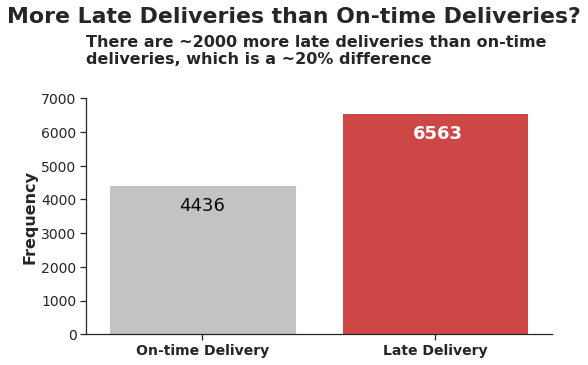

In [ ]:
plt.figure()
ax = sns.countplot(data=df, x='late_delivery', palette=[gray,red])
for p in ax.patches:
  color=white if p.get_height()>5000 else black
  fontweight='semibold' if p.get_height()>=dfg['id'].max()-1 else 'normal'
  ax.annotate(str(round(p.get_height(),2)), ((-0.1+p.get_x()+p.get_width()/2)*1.005, -800+(p.get_height() * 1.005)), color=color, fontsize=18, fontweight=fontweight)

plt.suptitle('More Late Deliveries than On-time Deliveries?',
             fontsize=22, fontweight='black', horizontalalignment='center', verticalalignment='top', y=1.02)
plt.title('There are ~2000 more late deliveries than on-time\ndeliveries, which is a ~20% difference',
          fontsize=16, fontweight='semibold', loc='left', y=1.12)

plt.ylim((0,7000))
plt.xlabel('', fontweight='semibold')
plt.ylabel('Frequency', fontweight='semibold')
plt.xticks(rotation=0, ticks=np.arange(2), labels=['On-time Delivery', 'Late Delivery'], fontweight='semibold')
plt.tight_layout()
plt.show()

Insight:
- Dari 11000 total shipment, 60% adalah late deliveries, yakni 20% lebih banyak dari on-time deliveries.
- On time delivery rate (banyaknya on time delivery dibagi total delivery) hanya sebesar ~40% dan perlu ditingkatkan oleh bisnis ecommerce

In [ ]:
dfg1 = df[df['late_delivery']==1].groupby(['customer_care_calls']).agg({'id':'nunique'}).reset_index()
dfg1['ratio'] = round(100*dfg1['id']/len(df),2)
dfg1['rel_ratio'] = round(100*dfg1['id']/dfg1['id'].sum(),2)
dfg1

customer_care_calls    id  ratio  rel_ratio
0                    2   416   3.78       6.34
1                    3  2011  18.28      30.64
2                    4  2126  19.33      32.39
3                    5  1360  12.36      20.72
4                    6   523   4.75       7.97
5                    7   127   1.15       1.94

In [ ]:
dfg2 = df[df['late_delivery']==0].groupby(['customer_care_calls']).agg({'id':'nunique'}).reset_index()
dfg2['ratio'] = round(100*dfg2['id']/len(df),2)
dfg2['rel_ratio'] = round(100*dfg2['id']/dfg2['id'].sum(),2)
dfg2

customer_care_calls    id  ratio  rel_ratio
0                    2   222   2.02       5.00
1                    3  1206  10.96      27.19
2                    4  1431  13.01      32.26
3                    5   968   8.80      21.82
4                    6   490   4.45      11.05
5                    7   119   1.08       2.68

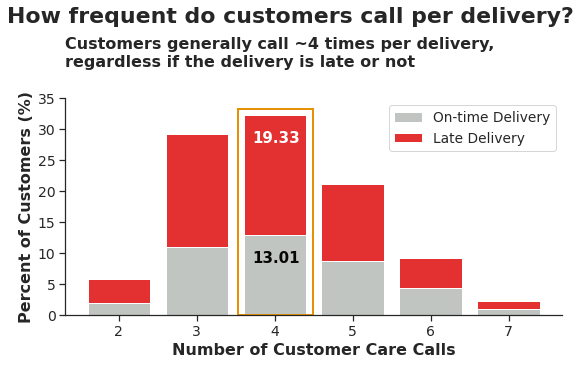

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(dfg2['customer_care_calls'], dfg2['ratio'], label='On-time Delivery', color=gray)
ax.bar(dfg1['customer_care_calls'], dfg1['ratio'], bottom=dfg2['ratio'], label='Late Delivery', color=red)

for p in ax.patches:
  color=white if p.get_y()>0 else black
  if p.get_x()== 3.6:
    ax.annotate(str(round(p.get_height(),2)), (0.095+(p.get_x() * 1.005), -4.5+(p.get_y() * 1.005)+(p.get_height())), color=color, fontweight='semibold')
  # print(p)

rect = patches.Rectangle((3.525, 0), 0.97, 33.25, linewidth=2, edgecolor=orange, facecolor='none')
ax.add_patch(rect)

plt.suptitle('How frequent do customers call per delivery?',
             fontsize=22, fontweight='black', horizontalalignment='center', verticalalignment='top', y=1.02)
plt.title('Customers generally call ~4 times per delivery,\nregardless if the delivery is late or not',
          fontsize=16, fontweight='semibold', loc='left', y=1.12)

plt.ylabel('Percent of Customers (%)', fontsize=16, fontweight='semibold')
plt.xlabel('Number of Customer Care Calls', fontsize=16, fontweight='semibold')
# plt.xticks(rotation=0, ticks=np.arange(4), labels=labels) # labels
plt.ylim(0,35)
ax.legend()

plt.tight_layout()
plt.show()

Insight:
- Customer umumnya melakukan customer care calls sebanyak kurang lebih 4 kali untuk setiap shipment, pada late delivery maupun on-time delivery.
- Apakah banyaknya customer care calls dipengaruhi oleh late delivery? (Dibuktikan dengan uji hipotesa)

In [ ]:
dfg = df.groupby(['customer_care_calls',]).agg({'late_delivery':'sum','id':'nunique'})
dfg['rel_ratio'] = dfg['late_delivery']/dfg['id']
dfg['abs_ratio'] = dfg['late_delivery']/len(df)
dfg

late_delivery    id  rel_ratio  abs_ratio
customer_care_calls                                           
2                              416   638   0.652038   0.037822
3                             2011  3217   0.625117   0.182835
4                             2126  3557   0.597695   0.193290
5                             1360  2328   0.584192   0.123648
6                              523  1013   0.516288   0.047550
7                              127   246   0.516260   0.011547

In [ ]:
late_delivery = df[df['late_delivery']==1]
on_time_delivery = df[df['late_delivery']==0]

In [ ]:
late_delivery['customer_care_calls'].mean()

3.9914673167758647

In [ ]:
on_time_delivery['customer_care_calls'].mean()

4.147655545536519

In [ ]:
tstat, p_value = st.ttest_ind(a=on_time_delivery['customer_rating'], b=late_delivery['customer_rating'])
print('P-Value :',p_value)
if p_value >= 0.05:
    print('Fail to Reject H0')
else:
    print('Reject H0 and Accept H1')

P-Value : 0.16890489722530824
Fail to Reject H0


Insight:
- Customer care calls dari on time delivery lebih banyak daripada late delivery, namun tidak signifikan
- Customer care calls tidak dipengaruhi oleh late delivery

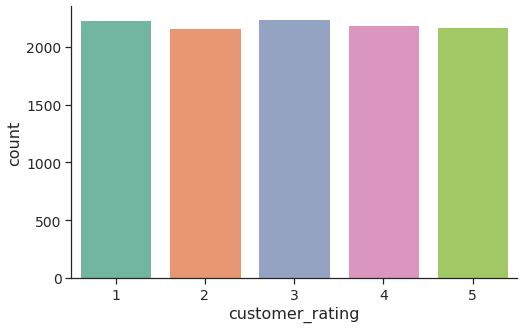

In [ ]:
sns.countplot(data=df, x='customer_rating')

In [ ]:
dfg = df.groupby(['customer_rating',]).agg({'late_delivery':'sum','id':'nunique'})
dfg['rel_ratio'] = dfg['late_delivery']/dfg['id']
dfg['abs_ratio'] = dfg['late_delivery']/len(df)
dfg

late_delivery    id  rel_ratio  abs_ratio
customer_rating                                           
1                         1313  2235   0.587472   0.119374
2                         1273  2165   0.587991   0.115738
3                         1357  2239   0.606074   0.123375
4                         1303  2189   0.595249   0.118465
5                         1317  2171   0.606633   0.119738

Insight:
- Nilai customer rating tidak dipengaruhi oleh late delivery (dibuktikan dengan uji hipotesa)

In [ ]:
late_delivery = df[df['late_delivery']==1]
on_time_delivery = df[df['late_delivery']==0]

In [ ]:
late_delivery['customer_rating'].mean()

3.005790035044949

In [ ]:
on_time_delivery['customer_rating'].mean()

2.967989179440938

In [ ]:
tstat, p_value = st.ttest_ind(a=on_time_delivery['customer_rating'], b=late_delivery['customer_rating'])
print('P-Value :',p_value)
if p_value >= 0.05:
    print('Fail to Reject H0')
else:
    print('Reject H0 and Accept H1')

P-Value : 0.16890489722530824
Fail to Reject H0


Insight:
- Terbukti bahwa late delivery / on-time delivery tidak mempengaruhi customer rating
- Customer rating tidak bisa menjadi 'measure of success' dari on time delivery rate

In [ ]:
df.groupby('late_delivery').agg({'customer_care_calls':'mean',
                                       'customer_rating':'mean'})

customer_care_calls  customer_rating
late_delivery                                      
0                         4.147656         2.967989
1                         3.991467         3.005790

In [ ]:
dfg = df.groupby(['warehouse_block', 'mode_of_shipment']).agg({'late_delivery':'sum',
                                                               'id':'nunique'
                                                               }).reset_index()
dfg['ratio'] = round(100*dfg['late_delivery']/len(df),2)
dfg['rel_ratio'] = round(100*dfg['late_delivery']/dfg['id'],2)
dfg['warehouse_shipment'] = dfg['warehouse_block']+' - '+dfg['mode_of_shipment']
dfg

warehouse_block mode_of_shipment  ...  rel_ratio  warehouse_shipment
0                A           Flight  ...      58.59          A - Flight
1                A             Road  ...      57.14            A - Road
2                A             Ship  ...      59.02            A - Ship
3                B           Flight  ...      59.80          B - Flight
4                B             Road  ...      58.50            B - Road
5                B             Ship  ...      60.74            B - Ship
6                C           Flight  ...      62.37          C - Flight
7                C             Road  ...      57.48            C - Road
8                C             Ship  ...      59.57            C - Ship
9                D           Flight  ...      59.93          D - Flight
10               D             Road  ...      59.59            D - Road
11               D             Ship  ...      59.76            D - Ship
12               F           Flight  ...      60.14          F - Flight
13               F             Road  ...      60.07            F - Road
14               F             Ship  ...      59.73            F - Ship

[15 rows x 7 columns]

In [ ]:
dfg[dfg['mode_of_shipment']=='Flight']['ratio']+dfg[dfg['mode_of_shipment']=='Road']['ratio'].values

0     3.11
3     3.17
6     3.21
9     3.20
12    6.44
Name: ratio, dtype: float64

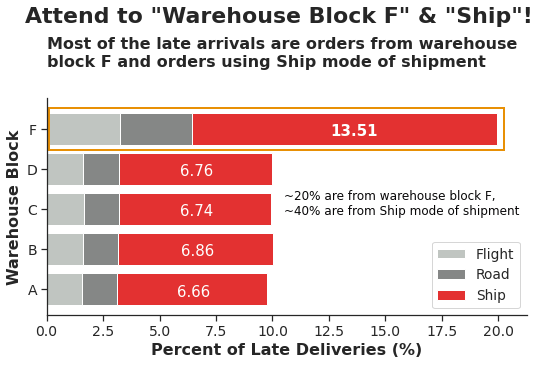

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax.barh(dfg[dfg['mode_of_shipment']=='Flight']['warehouse_block'], dfg[dfg['mode_of_shipment']=='Flight']['ratio'], label='Flight', color=gray)
ax.barh(dfg[dfg['mode_of_shipment']=='Road']['warehouse_block'], dfg[dfg['mode_of_shipment']=='Road']['ratio'], label='Road', color=darkgray, left=dfg[dfg['mode_of_shipment']=='Flight']['ratio'])
ax.barh(dfg[dfg['mode_of_shipment']=='Ship']['warehouse_block'], dfg[dfg['mode_of_shipment']=='Ship']['ratio'], label='Ship', color=red, left=(dfg[dfg['mode_of_shipment']=='Flight']['ratio']+dfg[dfg['mode_of_shipment']=='Road']['ratio'].values))

for p in ax.patches:
  color=white
  fontweight='semibold' if p.get_width()>=dfg['ratio'].max()-1 else 'normal'
  if p.get_width()>6:
    ax.annotate(str(round(p.get_width(),2)), (-0.7+(p.get_x()+p.get_width()/2)*1.005, 0.23+p.get_y()*1.005), color=color, fontweight=fontweight)
  # print(p)

string='~20% are from warehouse block F,\n~40% are from Ship mode of shipment'
ax.annotate(string, (-2.75+(p.get_x()+p.get_width()/2)*1.005, -1.75+p.get_y()*1.005), color=black, fontsize=12)

rect = patches.Rectangle((0.1, 3.475), 20.15, 1.05, linewidth=2, edgecolor=orange, facecolor='none')
ax.add_patch(rect)

plt.suptitle('Attend to "Warehouse Block F" & "Ship"!',
             fontsize=22, fontweight='bold', horizontalalignment='center', verticalalignment='top', y=1.02)
plt.title('Most of the late arrivals are orders from warehouse\nblock F and orders using Ship mode of shipment',
          fontsize=16, fontweight='semibold', loc='left', y=1.12)

plt.ylabel('Warehouse Block', fontsize=16, fontweight='semibold')
plt.xlabel('Percent of Late Deliveries (%)', fontsize=16, fontweight='semibold')
# plt.xticks(rotation=0, ticks=np.arange(4), labels=labels) # labels
ax.legend()

plt.tight_layout()
plt.show()

Insight:
- 20% dari late deliveries merupakan shipment dari warehouse block F.
- Bisakah shipment didistribusi untuk warehouse block lainnya secara evenly? (clearly there is an issue with product shipment distribution among the warehouse blocks)
- Perlu ditambah pekerja/couriers untuk warehouse block F? (allocating more workers in warehouse block F can maybe help the delay)
- 40% dari late deliveries merupakan shipment yang menggunakan Ship/kapal.
- Can we advise customers that ship method generally takes longer time to deliver and prolong expected arrival date? (see issues with cargo ships)

Links:
- http://www.pacificmarine.net/marine-deck/cargo-securing/how-do-container-ships-work.htm
- https://www.searates.com/blog/post/25-most-common-reasons-of-cargo-delays

<BarContainer object of 15 artists>

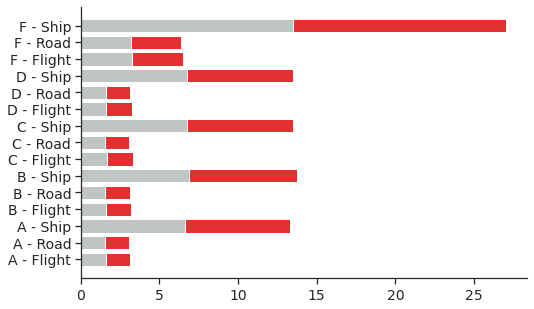

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax.barh(dfg['warehouse_shipment'], dfg['ratio'], label='On-time Delivery', color=gray)
ax.barh(dfg['warehouse_shipment'], dfg['ratio'], left=dfg['ratio'], label='Late Deliveries', color=red)

In [ ]:
df.groupby('warehouse_block').agg({'prior_purchases':['mean','median'],
                                   'cost_of_the_product':['mean','median'],
                                   'discount_offered':['mean','median'],
                                   'weight_in_gms':['mean','median'],
                                   'customer_rating':['mean','median'],
                                   'customer_care_calls':['mean','median'],})

prior_purchases         ... customer_care_calls       
                           mean median  ...                mean median
warehouse_block                         ...                           
A                      3.577741      3  ...            4.038189      4
B                      3.575014      3  ...            4.020185      4
C                      3.554828      3  ...            4.064921      4
D                      3.601963      3  ...            4.053435      4
F                      3.548009      3  ...            4.075014      4

[5 rows x 12 columns]

In [ ]:
dfg = df.groupby(['mode_of_shipment']).agg({'prior_purchases':['mean','median'],
                                   'cost_of_the_product':['mean','median'],
                                   'discount_offered':['mean','median'],
                                   'weight_in_gms':['mean','median'],
                                   'customer_rating':['mean','median'],
                                   'customer_care_calls':['mean','median'],})
dfg

prior_purchases         ... customer_care_calls       
                            mean median  ...                mean median
mode_of_shipment                         ...                           
Flight                  3.566685      3  ...            4.104108      4
Road                    3.581250      3  ...            4.063068      4
Ship                    3.564594      3  ...            4.040606      4

[3 rows x 12 columns]

In [ ]:
dfg = df.groupby('product_importance').agg({'late_delivery':'sum',
                                            'id':'nunique'}).reset_index()
dfg['ontime'] = dfg['id']-dfg['late_delivery']
dfg['rel_ratio'] = dfg['late_delivery']/dfg['id']
dfg['late_ratio'] = round(100*dfg['late_delivery']/len(df),2)
dfg['ontime_ratio'] = round(100*dfg['ontime']/len(df),2)
dfg = dfg.sort_values('late_ratio', ascending=False)
dfg['product_importance'] = dfg['product_importance'].apply(lambda x: x.capitalize())
dfg

product_importance  late_delivery    id  ...  rel_ratio  late_ratio  ontime_ratio
1                Low           3140  5297  ...   0.592788       28.55         19.61
2             Medium           2807  4754  ...   0.590450       25.52         17.70
0               High            616   948  ...   0.649789        5.60          3.02

[3 rows x 7 columns]

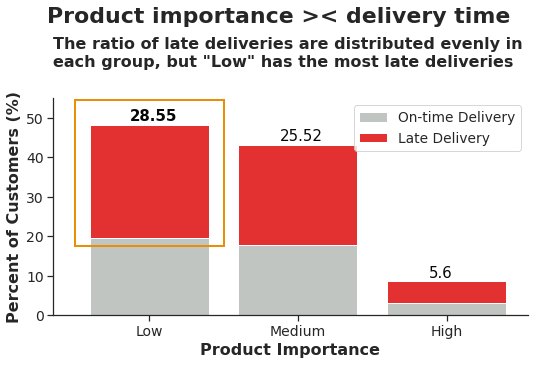

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(dfg['product_importance'], dfg['ontime_ratio'], label='On-time Delivery', color=gray)
ax.bar(dfg['product_importance'], dfg['late_ratio'], label='Late Delivery', color=red, bottom=dfg['ontime_ratio'])

for p in ax.patches:
  color=black
  fontweight='semibold' if p.get_height()>=dfg['late_ratio'].max()-1 else 'normal'
  if p.get_y()>0:
    ax.annotate(str(round(p.get_height(),2)), (0.275+(p.get_x()*1.005), 1+(p.get_y()*1.005)+(p.get_height())), color=color, fontweight=fontweight)
  # print(p)

rect = patches.Rectangle((-0.5, 17.5), 1, 37, linewidth=2, edgecolor=orange, facecolor='none')
ax.add_patch(rect)

plt.suptitle('Product importance >< delivery time',
             fontsize=22, fontweight='black', horizontalalignment='center', verticalalignment='top', y=1.02)
plt.title('The ratio of late deliveries are distributed evenly in\neach group, but "Low" has the most late deliveries',
          fontsize=16, fontweight='semibold', loc='left', y=1.12)

plt.ylabel('Percent of Customers (%)', fontsize=16, fontweight='semibold')
plt.xlabel('Product Importance', fontsize=16, fontweight='semibold')
# plt.xticks(rotation=0, ticks=np.arange(4), labels=labels) # labels
plt.ylim(0,55)
ax.legend()

plt.tight_layout()
plt.show()

Insight:
- 28.55% dari late deliveries adalah yang low importance.
- Secara relatif, setiap importance group memiliki rasio late deliveries yang serupa

In [ ]:
dfg = df.groupby(['product_importance'], sort=False).agg({'prior_purchases':['mean','median'],
                                   'cost_of_the_product':['mean','median'],
                                   'discount_offered':['mean','median'],
                                   'weight_in_gms':['mean','median'],
                                   'customer_rating':['mean','median'],
                                   'customer_care_calls':['mean','median'],})
dfg

prior_purchases         ... customer_care_calls       
                              mean median  ...                mean median
product_importance                         ...                           
low                       3.528224      3  ...            4.110251      4
medium                    3.593605      3  ...            4.028607      4
high                      3.657173      3  ...            3.872363      4

[3 rows x 12 columns]

In [ ]:
dfg = df.groupby(['late_delivery','product_importance']).agg({'prior_purchases':['mean','median'],
                                   'cost_of_the_product':['mean','median'],
                                   'discount_offered':['mean','median'],
                                   'weight_in_gms':['mean','median'],
                                   'customer_rating':['mean','median'],
                                   'customer_care_calls':['mean','median'],}).sort_values(('prior_purchases','mean'))
dfg

prior_purchases  ... customer_care_calls
                                            mean  ...              median
late_delivery product_importance                  ...                    
1             low                       3.451592  ...                   4
              medium                    3.533666  ...                   4
              high                      3.573052  ...                   4
0             low                       3.639777  ...                   4
              medium                    3.680021  ...                   4
              high                      3.813253  ...                   4

[6 rows x 12 columns]

Insight:
- the higher the product importance, generally the heavier
- for late deliveries, more discounts are offered the higher the importance of the product
- the higher the importance of product, the lower the cost of product
- most likely cost of product takes into account of the discount offered

In [ ]:
dfg = df.groupby(['late_delivery']).agg({'prior_purchases':'mean',
                                                                 'cost_of_the_product':'mean',
                                                                 'discount_offered':'mean',
                                                                 'weight_in_gms':'mean',
                                                                 'customer_care_calls':'mean',
                                                                 'customer_rating':'mean'})
dfg

prior_purchases  ...  customer_rating
late_delivery                   ...                 
0                     3.670424  ...         2.967989
1                     3.498095  ...         3.005790

[2 rows x 6 columns]

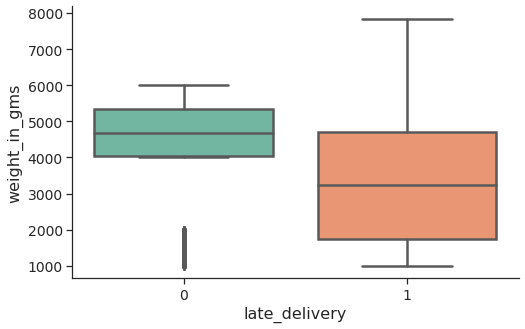

In [ ]:
sns.boxplot(data=df, y='weight_in_gms', x='late_delivery')

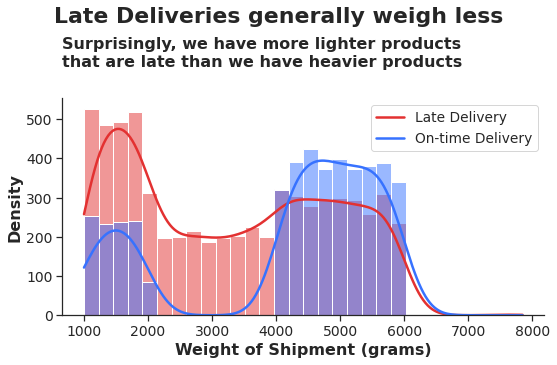

In [ ]:
plt.figure(figsize=(8,5))
# ax = sns.kdeplot(data=df, x='weight_in_gms', hue='late_delivery', palette=[blue,red], fill=True, alpha=0.6, legend=False)
ax = sns.histplot(data=df, x='weight_in_gms', hue='late_delivery', palette=[blue,red], alpha=0.5, legend=False, bins=30, kde=True)

# rect = patches.Rectangle((800, 0.000088), 1600, 0.00011, linewidth=2, edgecolor=black, facecolor='none')
# ax.add_patch(rect)

plt.suptitle('Late Deliveries generally weigh less',
             fontsize=22, fontweight='black', horizontalalignment='center', verticalalignment='top', y=1.02)
plt.title('Surprisingly, we have more lighter products\nthat are late than we have heavier products',
          fontsize=16, fontweight='semibold', loc='left', y=1.12)

plt.ylabel('Density', fontsize=16, fontweight='semibold')
plt.xlabel('Weight of Shipment (grams)', fontsize=16, fontweight='semibold')
# plt.xticks(rotation=0, ticks=np.arange(4), labels=labels) # labels
# plt.ylim(0,0.00020)

plt.legend(title='', loc='upper right', labels=['Late Delivery', 'On-time Delivery'])
plt.tight_layout()
plt.show()

Insight:
- lighter products are more likely to be a late delivery

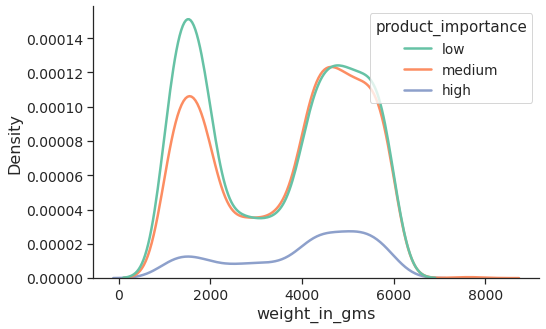

In [ ]:
sns.kdeplot(data=df, x='weight_in_gms', hue='product_importance')

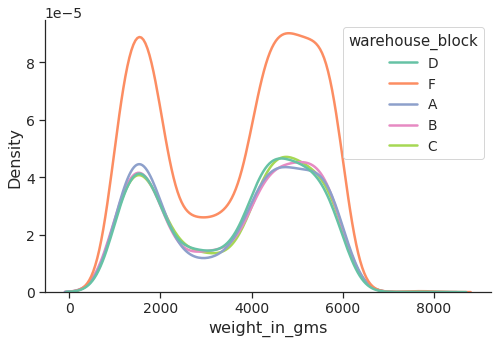

In [ ]:
sns.kdeplot(data=df, x='weight_in_gms', hue='warehouse_block')

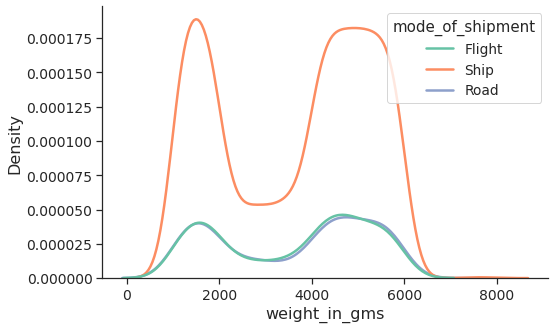

In [ ]:
sns.kdeplot(data=df, x='weight_in_gms', hue='mode_of_shipment')

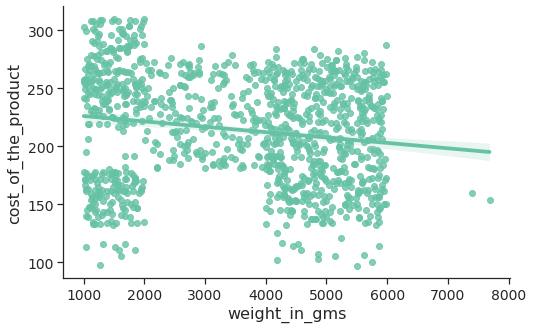

In [ ]:
sns.regplot(data=df.sample(frac=0.1, random_state=13), x='weight_in_gms', y='cost_of_the_product')

In [ ]:
df

id warehouse_block  ... weight_in_gms  late_delivery
0          1               D  ...          1233              1
1          2               F  ...          3088              1
2          3               A  ...          3374              1
3          4               B  ...          1177              1
4          5               C  ...          2484              1
...      ...             ...  ...           ...            ...
10994  10995               A  ...          1538              1
10995  10996               B  ...          1247              0
10996  10997               C  ...          1155              0
10997  10998               F  ...          1210              0
10998  10999               D  ...          1639              0

[10999 rows x 12 columns]

In [ ]:
high_calls = df[df['customer_care_calls']>4]
low_calls = df[df['customer_care_calls']<=4]

In [ ]:
high_calls[nums].describe().transpose()

count         mean          std  ...     50%     75%      max
id                   3587.0  6189.669362  3001.537152  ...  6538.0  8750.0  10998.0
customer_care_calls  3587.0     5.419571     0.617089  ...     5.0     6.0      7.0
customer_rating      3587.0     3.005854     1.426277  ...     3.0     4.0      5.0
cost_of_the_product  3587.0   227.729300    49.672727  ...   240.0   265.0    310.0
prior_purchases      3587.0     3.952607     1.338222  ...     4.0     5.0     10.0
discount_offered     3587.0    11.121550    14.228466  ...     7.0    10.0     65.0
weight_in_gms        3587.0  3049.156677  1689.841824  ...  2201.0  4712.5   6000.0
late_delivery        3587.0     0.560357     0.496413  ...     1.0     1.0      1.0

[8 rows x 8 columns]

In [ ]:
low_calls[nums].describe().transpose()

count         mean          std  ...     50%      75%      max
id                   7412.0  5166.237992  3203.348149  ...  4871.5  7939.25  10999.0
customer_care_calls  7412.0     3.393821     0.641042  ...     3.0     4.00      4.0
customer_rating      7412.0     2.983135     1.407466  ...     3.0     4.00      5.0
cost_of_the_product  7412.0   201.712089    44.871997  ...   202.0   241.00    310.0
prior_purchases      7412.0     3.381274     1.571166  ...     3.0     4.00     10.0
discount_offered     7412.0    14.462898    16.974326  ...     7.0    15.25     65.0
weight_in_gms        7412.0  3917.056800  1530.197027  ...  4357.0  5171.00   7846.0
late_delivery        7412.0     0.614274     0.486799  ...     1.0     1.00      1.0

[8 rows x 8 columns]

Insight:
- high calls have generally higher product cost, higher prior purchases
- high calls have generally less discount offered, less weight in grams
- low calls have more late deliveries compared to high calls

In [ ]:
high_calls[cats].describe().transpose()

count unique   top  freq
warehouse_block     3587      5     F  1222
mode_of_shipment    3587      3  Ship  2395
product_importance  3587      3   low  1828
gender              3587      2     F  1808

In [ ]:
low_calls[cats].describe().transpose()

count unique   top  freq
warehouse_block     7412      5     F  2444
mode_of_shipment    7412      3  Ship  5067
product_importance  7412      3   low  3469
gender              7412      2     F  3737

In [ ]:
dfg1 = high_calls.groupby('late_delivery').agg({'id':'nunique'})
dfg1['rel_ratio'] = dfg1['id']/dfg1['id'].sum()
dfg1

id  rel_ratio
late_delivery                 
0              1577   0.439643
1              2010   0.560357

In [ ]:
dfg2 = low_calls.groupby('late_delivery').agg({'id':'nunique'})
dfg2['rel_ratio'] = dfg2['id']/dfg2['id'].sum()
dfg2

id  rel_ratio
late_delivery                 
0              2859   0.385726
1              4553   0.614274

In [ ]:
high_rating = df[df['customer_rating']>=4]
low_rating = df[df['customer_rating']<4]

In [ ]:
high_rating[nums].describe().transpose()

count         mean          std  ...     50%      75%      max
id                   4360.0  5496.945413  3153.491103  ...  5490.5  8221.25  10999.0
customer_care_calls  4360.0     4.064679     1.147702  ...     4.0     5.00      7.0
customer_rating      4360.0     4.497936     0.500053  ...     4.0     5.00      5.0
cost_of_the_product  4360.0   210.646789    48.387890  ...   216.0   252.00    310.0
prior_purchases      4360.0     3.586697     1.561556  ...     3.0     4.00     10.0
discount_offered     4360.0    13.375459    16.110868  ...     7.0    10.00     65.0
weight_in_gms        4360.0  3644.204128  1625.654162  ...  4157.0  5042.00   7684.0
late_delivery        4360.0     0.600917     0.489766  ...     1.0     1.00      1.0

[8 rows x 8 columns]

In [ ]:
low_rating[nums].describe().transpose()

count         mean          std  ...     50%     75%      max
id                   6639.0  5502.006025  3189.747267  ...  5508.0  8266.5  10998.0
customer_care_calls  6639.0     4.047748     1.137428  ...     4.0     5.0      7.0
customer_rating      6639.0     2.000603     0.820974  ...     2.0     3.0      3.0
cost_of_the_product  6639.0   209.901341    47.850240  ...   214.0   250.0    310.0
prior_purchases      6639.0     3.555053     1.496890  ...     3.0     4.0     10.0
discount_offered     6639.0    13.371743    16.268603  ...     7.0    10.0     65.0
weight_in_gms        6639.0  3627.326405  1641.819135  ...  4145.0  5054.5   7846.0
late_delivery        6639.0     0.593915     0.491138  ...     1.0     1.0      1.0

[8 rows x 8 columns]

In [ ]:
high_rating[cats].describe().transpose()

count unique   top  freq
warehouse_block     4360      5     F  1463
mode_of_shipment    4360      3  Ship  2935
product_importance  4360      3   low  2111
gender              4360      2     F  2191

In [ ]:
low_rating[cats].describe().transpose()

count unique   top  freq
warehouse_block     6639      5     F  2203
mode_of_shipment    6639      3  Ship  4527
product_importance  6639      3   low  3186
gender              6639      2     F  3354

In [ ]:
df[df['customer_rating']==1].describe()

id  customer_care_calls  ...  weight_in_gms  late_delivery
count   2235.000000          2235.000000  ...    2235.000000    2235.000000
mean    5572.305145             4.036242  ...    3654.797315       0.587472
std     3194.633190             1.142502  ...    1635.767150       0.492399
min        6.000000             2.000000  ...    1003.000000       0.000000
25%     2761.000000             3.000000  ...    1841.500000       0.000000
50%     5659.000000             4.000000  ...    4166.000000       1.000000
75%     8372.000000             5.000000  ...    5074.000000       1.000000
max    10996.000000             7.000000  ...    6064.000000       1.000000

[8 rows x 8 columns]

In [ ]:
df[df['customer_rating']==5].describe()

id  customer_care_calls  ...  weight_in_gms  late_delivery
count   2171.000000          2171.000000  ...    2171.000000    2171.000000
mean    5489.732842             4.090742  ...    3586.005067       0.606633
std     3165.658259             1.172481  ...    1634.936757       0.488610
min        2.000000             2.000000  ...    1001.000000       0.000000
25%     2699.500000             3.000000  ...    1799.500000       0.000000
50%     5516.000000             4.000000  ...    4096.000000       1.000000
75%     8283.000000             5.000000  ...    5010.500000       1.000000
max    10999.000000             7.000000  ...    7401.000000       1.000000

[8 rows x 8 columns]

In [ ]:
df.groupby('customer_care_calls').agg({'id':['mean','median'],
                                   'prior_purchases':['mean','median'],
                                   'cost_of_the_product':['mean','median'],
                                   'discount_offered':['mean','median'],
                                   'weight_in_gms':['mean','median'],
                                   'customer_rating':['mean','median'],
                                   'customer_care_calls':['mean','median'],})

id          ... customer_care_calls       
                            mean  median  ...                mean median
customer_care_calls                       ...                           
2                    4419.606583  3871.0  ...                   2      2
3                    4971.798570  4523.0  ...                   3      3
4                    5476.010964  5416.0  ...                   4      4
5                    5917.528780  6174.5  ...                   5      5
6                    6508.210267  6589.0  ...                   6      6
7                    7453.333333  7725.0  ...                   7      7

[6 rows x 14 columns]

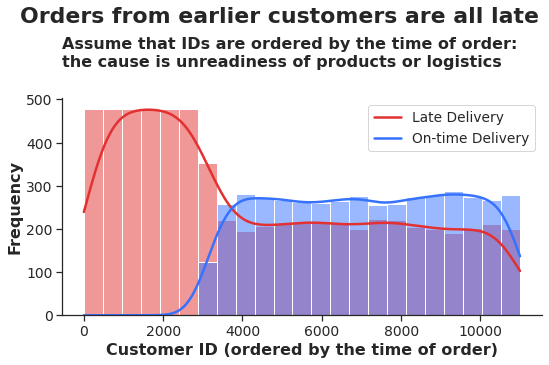

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.histplot(data=df, x='id', hue='late_delivery', alpha=0.5, kde=True, legend=False, palette=[blue,red])

plt.suptitle('Orders from earlier customers are all late',
             fontsize=22, fontweight='black', horizontalalignment='center', verticalalignment='top', y=1.02)
plt.title('Assume that IDs are ordered by the time of order:\nthe cause is unreadiness of products or logistics',
          fontsize=16, fontweight='semibold', loc='left', y=1.12)

plt.ylabel('Frequency', fontsize=16, fontweight='semibold')
plt.xlabel('Customer ID (ordered by the time of order)', fontsize=16, fontweight='semibold')
# plt.xticks(rotation=0, ticks=np.arange(4), labels=labels) # labels
# plt.ylim(0,0.00020)

plt.legend(title='', loc='upper right', labels=['Late Delivery', 'On-time Delivery'])
plt.tight_layout()
plt.show()

Insights:
- lower IDs were all late --> let's assume these IDs are in chronological order of the order time
- could this be because the shipment wasn't ready for these new orders?

In [ ]:
low_id = df[df['id']<4000]
high_id = df[df['id']>=4000]

In [ ]:
high_id[nums].describe().transpose()

count         mean          std  ...     50%      75%      max
id                   7000.0  7499.500000  2020.870275  ...  7499.5  9249.25  10999.0
customer_care_calls  7000.0     4.228143     1.183702  ...     4.0     5.00      7.0
customer_rating      7000.0     2.998429     1.415778  ...     3.0     4.00      5.0
cost_of_the_product  7000.0   217.693429    47.822339  ...   226.0   256.00    310.0
prior_purchases      7000.0     3.713571     1.494989  ...     3.0     4.00     10.0
discount_offered     7000.0     5.536000     2.883729  ...     6.0     8.00     10.0
weight_in_gms        7000.0  4048.487143  1629.745069  ...  4618.5  5297.00   6000.0
late_delivery        7000.0     0.435429     0.495848  ...     0.0     1.00      1.0

[8 rows x 8 columns]

In [ ]:
low_id[nums].describe().transpose()

count         mean          std  ...     50%     75%     max
id                   3999.0  2000.000000  1154.556192  ...  2000.0  2999.5  3999.0
customer_care_calls  3999.0     3.750438     0.993090  ...     4.0     4.0     7.0
customer_rating      3999.0     2.976744     1.409859  ...     3.0     4.0     5.0
cost_of_the_product  3999.0   197.074519    45.612095  ...   194.0   236.0   301.0
prior_purchases      3999.0     3.312078     1.537633  ...     3.0     4.0    10.0
discount_offered     3999.0    27.091773    20.299911  ...    23.0    45.0    65.0
weight_in_gms        3999.0  2908.512128  1371.151816  ...  2715.0  3818.0  7846.0
late_delivery        3999.0     0.878970     0.326203  ...     1.0     1.0     1.0

[8 rows x 8 columns]

In [ ]:
high_id[cats].describe().transpose()

count unique   top  freq
warehouse_block     7000      5     F  2333
mode_of_shipment    7000      3  Ship  4756
product_importance  7000      3   low  3445
gender              7000      2     F  3557

In [ ]:
low_id[cats].describe().transpose()

count unique   top  freq
warehouse_block     3999      5     F  1333
mode_of_shipment    3999      3  Ship  2706
product_importance  3999      3   low  1852
gender              3999      2     M  2011

In [ ]:
late = df[df['late_delivery']==1]
late.describe()

id  customer_care_calls  ...  weight_in_gms  late_delivery
count   6563.000000          6563.000000  ...    6563.000000         6563.0
mean    4424.978364             3.991467  ...    3272.640104            1.0
std     3243.986559             1.122592  ...    1576.148391            0.0
min        1.000000             2.000000  ...    1001.000000            1.0
25%     1641.500000             3.000000  ...    1735.500000            1.0
50%     3467.000000             4.000000  ...    3231.000000            1.0
75%     7194.500000             5.000000  ...    4696.500000            1.0
max    10995.000000             7.000000  ...    7846.000000            1.0

[8 rows x 8 columns]

In [ ]:
ontime = df[df['late_delivery']==0]
ontime.describe()

id  customer_care_calls  ...  weight_in_gms  late_delivery
count   4436.000000          4436.000000  ...    4436.000000         4436.0
mean    7090.479486             4.147656  ...    4168.668395            0.0
std     2278.543555             1.162771  ...    1573.954178            0.0
min     3136.000000             2.000000  ...    1001.000000            0.0
25%     5092.250000             3.000000  ...    4043.500000            0.0
50%     7096.000000             4.000000  ...    4674.000000            0.0
75%     9078.500000             5.000000  ...    5337.000000            0.0
max    10999.000000             7.000000  ...    6000.000000            0.0

[8 rows x 8 columns]

In [ ]:
early_id = df[df['id']<3000]
early_id.describe()

id  customer_care_calls  ...  weight_in_gms  late_delivery
count  2999.000000          2999.000000  ...    2999.000000         2999.0
mean   1500.000000             3.741914  ...    2361.877626            1.0
std     865.881054             0.994689  ...     921.524629            0.0
min       1.000000             2.000000  ...    1001.000000            1.0
25%     750.500000             3.000000  ...    1563.500000            1.0
50%    1500.000000             4.000000  ...    2229.000000            1.0
75%    2249.500000             4.000000  ...    3129.500000            1.0
max    2999.000000             7.000000  ...    7846.000000            1.0

[8 rows x 8 columns]

In [ ]:
high_id = df[df['id']>=3000]
high_id.describe()

id  customer_care_calls  ...  weight_in_gms  late_delivery
count   8000.00000          8000.000000  ...    8000.000000    8000.000000
mean    6999.50000             4.171625  ...    4110.909875       0.445500
std     2309.54541             1.170616  ...    1588.925959       0.497052
min     3000.00000             2.000000  ...    1001.000000       0.000000
25%     4999.75000             3.000000  ...    3114.750000       0.000000
50%     6999.50000             4.000000  ...    4636.000000       0.000000
75%     8999.25000             5.000000  ...    5310.250000       1.000000
max    10999.00000             7.000000  ...    6000.000000       1.000000

[8 rows x 8 columns]

In [ ]:
early_id[cats].describe()

warehouse_block mode_of_shipment product_importance gender
count             2999             2999               2999   2999
unique               5                3                  3      2
top                  F             Ship                low      F
freq               999             2046               1391   1525

In [ ]:
high_id[cats].describe()

warehouse_block mode_of_shipment product_importance gender
count             8000             8000               8000   8000
unique               5                3                  3      2
top                  F             Ship                low      F
freq              2667             5416               3906   4020

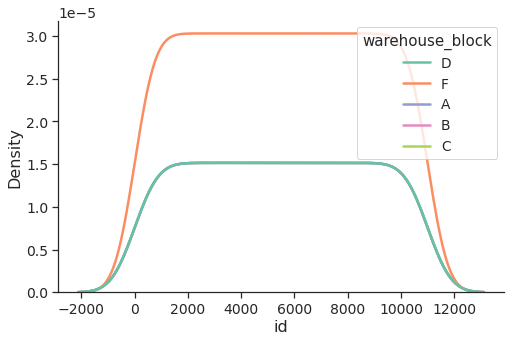

In [ ]:
sns.kdeplot(data=df, x='id', hue='warehouse_block')

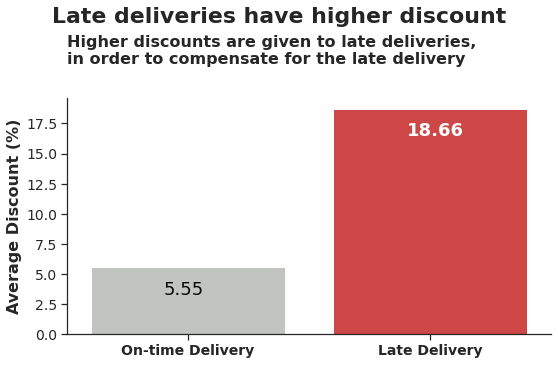

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=df, x='late_delivery', y='discount_offered', palette=[gray,red], ci=None)
for p in ax.patches:
  color=white if p.get_height()>15 else black
  fontweight='semibold' if p.get_height()>=15 else 'normal'
  ax.annotate(str(round(p.get_height(),2)), ((-0.1+p.get_x()+p.get_width()/2)*1.005, -2.25+(p.get_height() * 1.005)), color=color, fontsize=18, fontweight=fontweight)
  # print(p)

plt.suptitle('Late deliveries have higher discount',
             fontsize=22, fontweight='black', horizontalalignment='center', verticalalignment='top', y=1.02)
plt.title('Higher discounts are given to late deliveries,\nin order to compensate for the late delivery',
          fontsize=16, fontweight='semibold', loc='left', y=1.12)

plt.ylabel('Average Discount (%)', fontsize=16, fontweight='semibold')
plt.xlabel('', fontsize=16, fontweight='semibold')
plt.xticks(rotation=0, ticks=np.arange(2), labels=['On-time Delivery','Late Delivery'], fontweight='semibold') # labels

plt.tight_layout()
plt.show()

In [ ]:
sorted(df['prior_purchases'].unique())

[2, 3, 4, 5, 6, 7, 8, 10]

In [ ]:
df['prior_purchases'].value_counts(ascending=False, dropna=False)

3     3955
2     2599
4     2155
5     1287
6      561
10     178
7      136
8      128
Name: prior_purchases, dtype: int64

In [ ]:
df[df['prior_purchases']>=6].describe()

id  customer_care_calls  ...  weight_in_gms  late_delivery
count   1003.000000          1003.000000  ...    1003.000000    1003.000000
mean    5823.365902             4.075773  ...    3617.759721       0.589232
std     3153.688303             1.039270  ...    1631.340147       0.492219
min       38.000000             2.000000  ...    1003.000000       0.000000
25%     3100.000000             3.000000  ...    1850.500000       0.000000
50%     6071.000000             4.000000  ...    4165.000000       1.000000
75%     8520.500000             5.000000  ...    5002.500000       1.000000
max    10998.000000             6.000000  ...    5995.000000       1.000000

[8 rows x 8 columns]

In [ ]:
df[df['prior_purchases']<6].describe()

id  customer_care_calls  ...  weight_in_gms  late_delivery
count   9996.000000          9996.000000  ...    9996.000000    9996.000000
mean    5467.553421             4.052321  ...    3635.647959       0.597439
std     3175.780254             1.151272  ...    1635.854290       0.490438
min        1.000000             2.000000  ...    1001.000000       0.000000
25%     2720.750000             3.000000  ...    1837.750000       0.000000
50%     5445.500000             4.000000  ...    4147.500000       1.000000
75%     8224.250000             5.000000  ...    5054.000000       1.000000
max    10999.000000             7.000000  ...    7846.000000       1.000000

[8 rows x 8 columns]

# Data Preprocessing

## Handling outlier data

In [11]:
nums = [col for col in nums if col not in ['late_delivery']]

In [12]:
# lakukan pembuangan outlier menggunakan metode yang dipilih
print(f'Rows before filtering outliers: {len(df)}')
filtered_entries = np.array([True] * len(df[nums]))
for col in df[nums].columns:
    zscore = abs(st.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries # keeping absolute z score under 
df = df[filtered_entries].copy() # filter z score under 3
print(f'Rows after filtering outliers: {len(df)}')

Rows before filtering outliers: 10999
Rows after filtering outliers: 10642


id


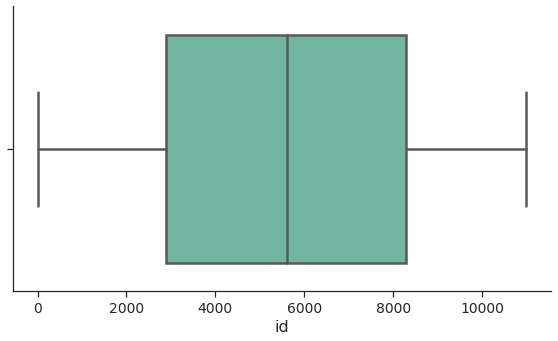

customer_care_calls


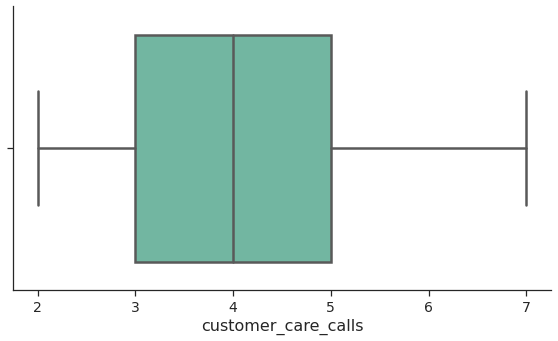

customer_rating


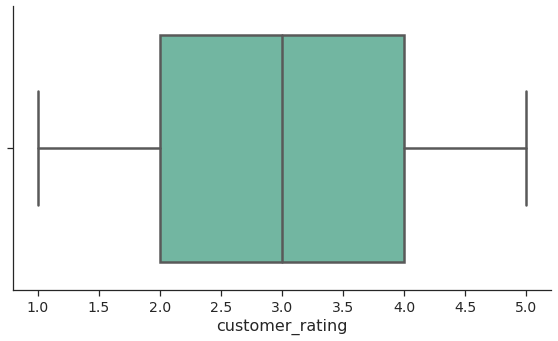

cost_of_the_product


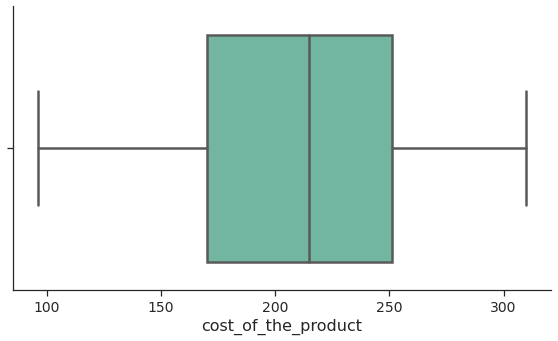

prior_purchases


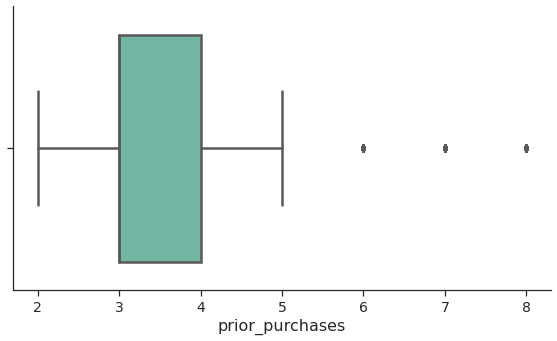

discount_offered


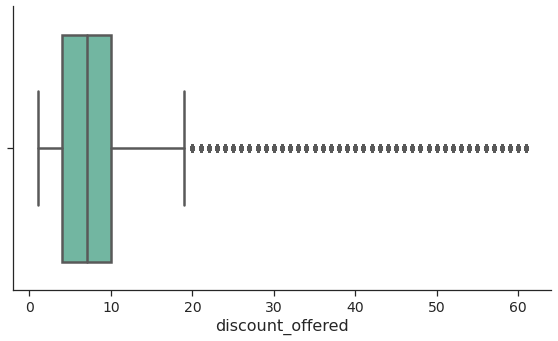

weight_in_gms


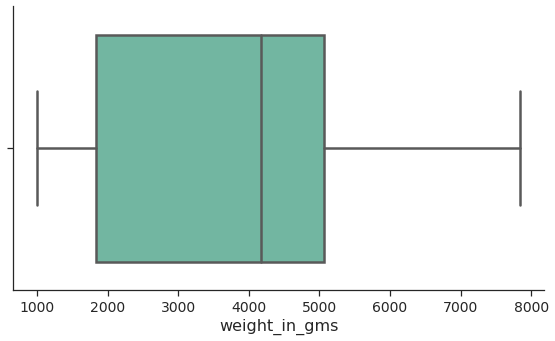

In [13]:
for col in nums:
  print(col)
  sns.boxplot(data=df, x=col)
  plt.tight_layout()
  plt.show()

## Handling imbalance data

In [14]:
pd.Series(df['late_delivery']).value_counts()

1    6282
0    4360
Name: late_delivery, dtype: int64

In [15]:
X = df[[col for col in df.columns if col not in ['late_delivery']]]
y = df['late_delivery']

In [16]:
i_cats = [i for i, col in enumerate(df.columns) if col in cats]

In [17]:
from imblearn import over_sampling

In [18]:
X_over, y_over = over_sampling.SMOTENC(categorical_features = i_cats, sampling_strategy=0.8, random_state=42).fit_resample(X,y)

In [19]:
print('SMOTE')
print(pd.Series(y_over).value_counts())

SMOTE
1    6282
0    5025
Name: late_delivery, dtype: int64


In [20]:
X,y = X_over,y_over
X.shape,y.shape

((11307, 11), (11307,))

## Splitting Data

Agar tidak terjadi data leak, ada perlunya data dibagi menjadi train set dan test set terlebih dahulu.

In [ ]:
# selected_features = ['warehouse_block', 'mode_of_shipment', 'product_importance', 'id', 'discount_offered', 'weight_in_gms']
# X = df[selected_features]
X = df[[col for col in df.columns if col not in ['late_delivery']]]
y = df['late_delivery']
X.shape, y.shape

((10999, 11), (10999,))

In [ ]:
from sklearn.model_selection import train_test_split
random_state = 42
stratify = None
X_train, X_test, y_train, y_test = train_test_split(X.copy(), y.copy(), test_size=0.3, random_state=random_state, stratify=stratify)
X_test.shape, X_train.shape, y_test.shape, y_train.shape

((3300, 11), (7699, 11), (3300,), (7699,))

## Hasil EDA

Dari EDA yang dilakukan, dapat disimpulkan bahwa terdapat beberapa tahap data preprocessing yang harus dilakukan untuk membantu proses machine learning modelling nantinya. Kesimpulan dari EDA beserta treatmentnya adalah sebagai berikut:

- Missing values --> tidak ada
- Duplicated data --> tidak ada
- Outlier data --> ada
  - Z-score
  - 1.5 * IQR
  - 3 * IQR
  - Tidak membuang outlier
- Imbalance target data --> 40:60
  - SMOTE
  - Tidak melakukan class balancing
- Redundant data --> tidak ada
- Transforming distributions
  - Right / Left skew
    - Moderate skew : np.sqrt(x) / np.sqrt((df.col.max()+1) - x)
    - Medium skew: np.log(x) / np.log((df.col.max()+1) - x)
    - Severe skew: 1/x / 1/((df.col.max()+1)-x)
  - Bimodal
    - abs(x) - df.col.mean()
- Encoding
  - One hot encoding / pd.get_dummies untuk warehouse_block, mode_of_shipment, product_importance
  - Label encoding untuk gender
- Scaling / Normalizing
  - [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler)
  - [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
  - [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)



Note: transformasi yang dilakukan pada train set harus dilakukan pada test set juga
- kalau test set buang outlier juga kah?
- test set tidak perlu class balancing
- test set harus melalui transformasi distribusi menggunakan metode yang sama
- test set harus di-scale/normalize menggunakan INSTANTIATED OBJECT yang sebelumnya sudah di-fit pada train set (transform test set menggunakan scaler yang sama tanpa harus fit lagi)

## Handling other data issues

### Transforming Distributions

In [ ]:
# Transformasi sesuai hasil EDA

In [ ]:
X_train['sqrt_weight_in_gms'] = X_train['weight_in_gms'].apply(lambda x: np.sqrt(x))

In [ ]:
X_train['sqrt_prior_purchases'] = X_train['prior_purchases'].apply(lambda x: np.sqrt(x))

In [ ]:
X_train['inv_discount_offered'] = X_train['discount_offered'].apply(lambda x: 1/x if x!=0 else 1/(np.median(X_train['discount_offered'])))

### Scaling / Normalizing

In [ ]:
# lakukan scaling/normalizing menggunakan metode yang dipilih
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
nums1 = [col for col in X_train.columns if X_train[col].dtype != 'object']
scaler.fit(X_train[nums1])
X_train_scaled = scaler.transform(X_train[nums1])
X_train[nums1] = X_train_scaled
X_train.head()

id warehouse_block  ... sqrt_prior_purchases  inv_discount_offered
9957  0.905338               B  ...             0.414214              0.152778
6382  0.580249               C  ...             0.000000              0.085000
1559  0.141675               F  ...             0.000000              1.000000
5703  0.518505               B  ...             0.000000              0.237500
6075  0.552332               B  ...             0.224745              0.322222

[5 rows x 14 columns]

id


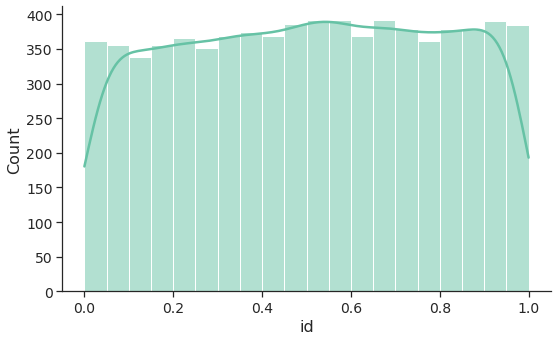

customer_care_calls


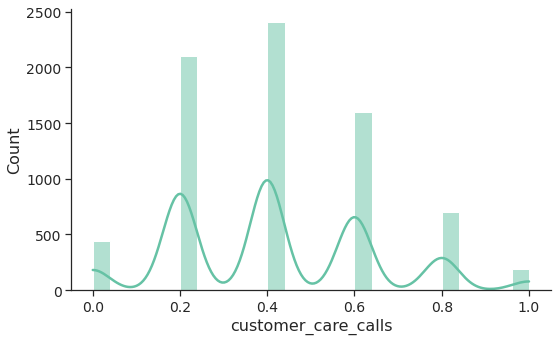

customer_rating


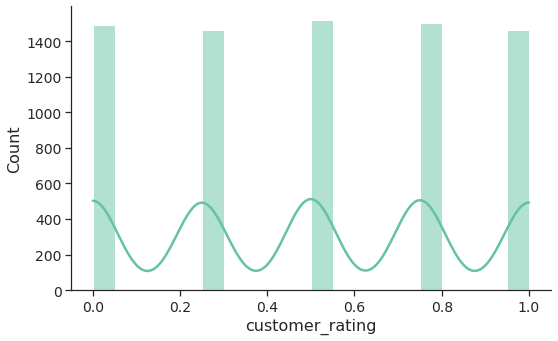

cost_of_the_product


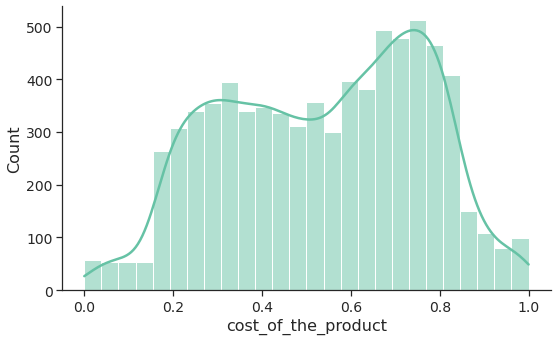

prior_purchases


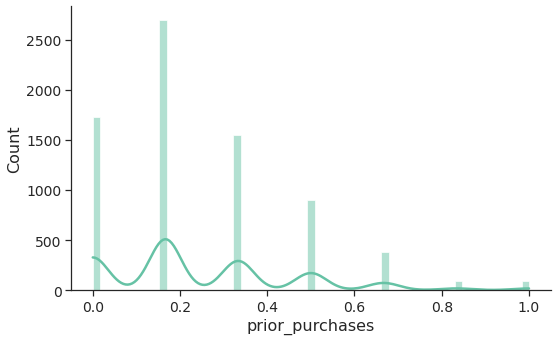

discount_offered


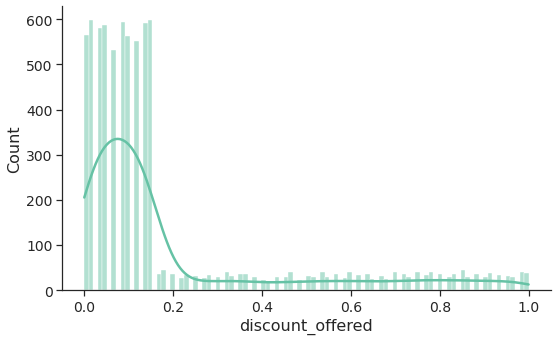

weight_in_gms


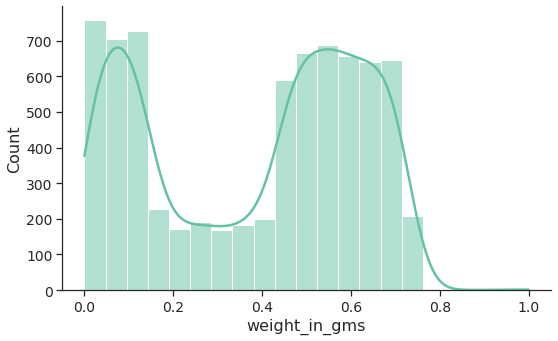

sqrt_weight_in_gms


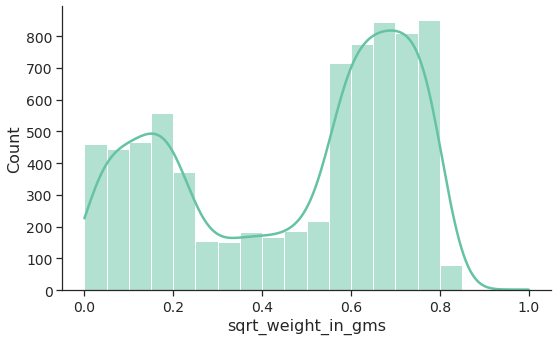

sqrt_prior_purchases


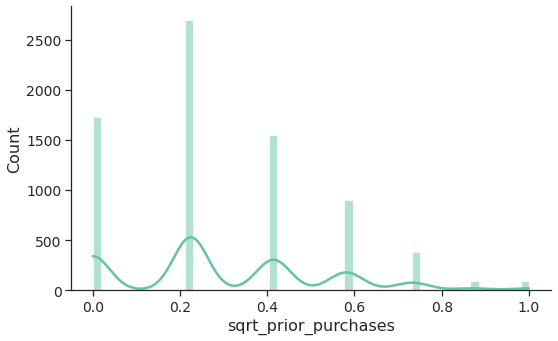

inv_discount_offered


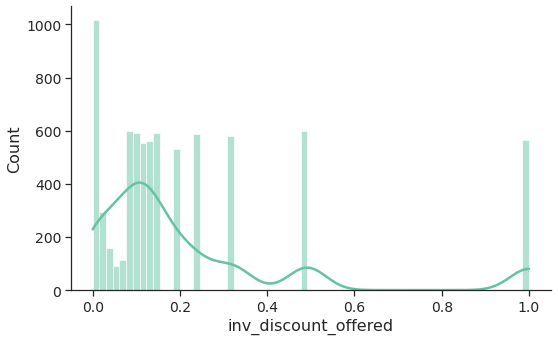

In [ ]:
# plot histogram (univariate) hasil transformasi

for col in X_train.columns:
  if X_train[col].dtype != 'object':
    print(col)
    sns.histplot(data=X_train, x=col, kde=True)
    plt.tight_layout()
    plt.show()

### Encoding

In [ ]:
# label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
labels = ['gender']
encoders = []
for i,label in enumerate(labels):
    i = LabelEncoder()
    i.fit(X_train[label])
    X_train[label] = i.transform(X_train[label])
    encoders.append(i)

In [ ]:
# one hot encoding / pd.get dummies

In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehotcats = [col for col in cats if col not in labels]
ohe = OneHotEncoder(drop='first', sparse=False).fit(X_train[onehotcats])

In [ ]:
X_train_ohe = ohe.transform(X_train[onehotcats])
to_merge = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(onehotcats))
X_train = X_train.reset_index().drop('index', axis=1)
X_train[ohe.get_feature_names(onehotcats)] = to_merge
X_train = X_train[[col for col in X_train if col not in onehotcats]].copy()
X_train.head()

id  ...  product_importance_medium
0  0.905338  ...                        0.0
1  0.580249  ...                        0.0
2  0.141675  ...                        0.0
3  0.518505  ...                        0.0
4  0.552332  ...                        1.0

[5 rows x 19 columns]

In [ ]:
X_train.shape

(7440, 19)

## Conclusion of Data Preprocessing

Pada tahap data preprocessing, untuk setiap masalah pada data saya melakukan treatment sebagai berikut:
- Outlier --> filtering Z-score < 3
- Distribution transformation:
  - weight in gms --> np.sqrt
  - prior purchases --> np.sqrt
  - discount offered --> inverse (1/median if x==0)
- Normalize --> MinMaxScaler
- LabelEncoder --> gender
- OneHotEncoder (drop=first) --> all categorical columns except gender

## Handling Test Set

In [ ]:
# lakukan handling yang sama pada test set

In [ ]:
X_test['sqrt_weight_in_gms'] = X_test['weight_in_gms'].apply(lambda x: np.sqrt(x))

In [ ]:
X_test['sqrt_prior_purchases'] = X_test['prior_purchases'].apply(lambda x: np.sqrt(x))

In [ ]:
X_test['inv_discount_offered'] = X_test['discount_offered'].apply(lambda x: 1/x if x!=0 else 1/(np.median(X_train['discount_offered'])))

In [ ]:
X_test_scaled = scaler.transform(X_test[nums1])
X_test[nums1] = X_test_scaled
X_test.head()

id warehouse_block  ... sqrt_prior_purchases  inv_discount_offered
107   0.009639               F  ...             0.224745              0.022436
5594  0.508593               A  ...             0.224745              0.152778
6997  0.636174               F  ...             0.414214              0.322222
3984  0.362190               D  ...             0.581139              1.000000
3111  0.282804               B  ...             0.000000              0.006439

[5 rows x 14 columns]

In [ ]:
for i, label in enumerate(labels):
    X_test[label] = encoders[i].transform(X_test[label])

In [ ]:
X_test_ohe = ohe.transform(X_test[onehotcats])
to_merge = pd.DataFrame(X_test_ohe, columns=ohe.get_feature_names(onehotcats))
X_test = X_test.reset_index().drop('index', axis=1)
X_test[ohe.get_feature_names(onehotcats)] = to_merge
X_test = X_test[[col for col in X_test if col not in onehotcats]].copy()
X_test.head()

id  ...  product_importance_medium
0  0.009639  ...                        0.0
1  0.508593  ...                        0.0
2  0.636174  ...                        0.0
3  0.362190  ...                        0.0
4  0.282804  ...                        1.0

[5 rows x 19 columns]

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8740, 19), (3300, 19), (8740,), (3300,))

# Feature Selection

List beberapa metode feature selection:
- Pearson Correlation. This is a filter-based method. (kemungkinan feature importance tidak berdasarkan ini karena tidak linear, tapi buat multicollinearity)
- [Chi-Squared](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html). This is another filter-based method.
- [Recursive Feature Elimination](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html). This is a wrapper based method.
- Lasso: Select From Model. (ini juga mending tidak dicoba karena data tidak linear)
- Tree-based: Select From Model. This is an Embedded method. (bisa pakai DecisionTreeRegressor, RandomForestRegressor, XGBRegressor, etc)

Pakai salah satu metode dari atas untuk menentukan feature importance. Lalu check multicollinearity.

Steps:
1. Ambil feature importance score yang tinggi (buang yang rendah)
2. Jangan lupa filter antar fitur yang berkorelasi tinggi (~0.7)

In [ ]:
# feature importance


In [ ]:
# multicollinearity


# Machine Learning

Steps:

1. Import model-model machine learning yang akan dipakai terlebih dahulu (kemungkinan tree-based, ensemble, stacking, bagging, boosting, dan kalau mau coba neural network)
2. Inisialasi masing-masing model sebagai objek, dan Fit data train untuk setiap model
3. Predict + predict proba data train dan evaluate metric ROC AUC dan RECALL (note: bisa pakai cross validation juga disini)
4. Predict + predict proba data test dan evaluate metric ROC AUC dan RECALL
5. Check overfit/underfit berdasarkan hasil prediksi train dan test
  - seandainya underfit, apa solusinya?
  - seandainya overfit, apa solusinya?
6. Pilih 1 (atau lebih) model yang hasilnya bagus dan lakukan hyperparameter tuning (RandomizedSearch atau GridSearch), predict test data, dan check lagi untuk overfit/underfit

Note: print [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) dan display [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html) ketika predict test data (atau ketika predict train data juga boleh)